### Project on A/B testing. 

#### Credit Thomas Tang. https://github.com/thomastt2020/

#### Probabilities

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

For this project we will use the 'ab_data.csv'. The file will be saved in the project container.

Reading and displaying the dataset

In [2]:
dataframe = pd.read_csv('ab_data.csv')
dataframe.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
# Using describe and shape to get the observation count and summary stats

dataframe.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [4]:
dataframe.shape

(294478, 5)

In [5]:
# No of data points with unique values in the dataset along the column axis
dataframe.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [6]:
#The proportion of users converted

dataframe.converted.mean()

0.11965919355605512

In [7]:
# Tabulating treatment observations that were sent to old page

dataframe.query('group == "treatment" and landing_page != "new_page"')

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
...,...,...,...,...,...
293773,688144,2017-01-16 20:34:50.450528,treatment,old_page,1
293817,876037,2017-01-17 16:15:08.957152,treatment,old_page,1
293917,738357,2017-01-05 15:37:55.729133,treatment,old_page,0
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0


In [8]:
# Tabulating control observations that were sent to new page

dataframe.query('group == "control" and landing_page != "old_page"')

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1
...,...,...,...,...,...
293894,741581,2017-01-09 20:49:03.391764,control,new_page,0
293996,942612,2017-01-08 13:52:28.182648,control,new_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


In [9]:
# Check if any of the remaning rows have null values

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [10]:
# Take all the control and treatment observations and put together into one dataframe

dataframe_control = dataframe.query('group == "control" and landing_page == "old_page"')
dataframe_treatment = dataframe.query('group == "treatment" and landing_page =="new_page"')
dataframe_ab = dataframe_treatment.merge(dataframe_control, how = 'outer')

dataframe_ab.describe()

,user_id,converted
count,290585.000000,290585.000000
mean,788004.825246,0.119597
std,91224.582639,0.324490
min,630000.000000,0.000000
25%,709035.000000,0.000000
50%,787995.000000,0.000000
75%,866956.000000,0.000000
max,945999.000000,1.000000


In [11]:
dataframe_ab.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [12]:
#Double check to make sure if all the right rows were removed

dataframe_ab[((dataframe_ab['group'] == 'treatment') == (dataframe_ab['landing_page']=='new_page'))==False].shape[0]

0

In [13]:
# Tabulating the unique observations

dataframe_ab.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

290584 user_id but 290585 timestamp

In [14]:
dataframe_ab.user_id.value_counts()

773192    2
661590    1
750063    1
942866    1
714045    1
         ..
702562    1
706568    1
759781    1
794714    1
697314    1
Name: user_id, Length: 290584, dtype: int64

In [15]:
# Remove the duplicated column from the dataframe

dataframe_ab[dataframe_ab.duplicated(['user_id'], keep= False)]

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [16]:
dataframe_ab = dataframe_ab[~dataframe_ab.duplicated(['user_id'], keep = 'first' )]

In [17]:
dataframe_ab.shape

(290584, 5)

In [18]:
# Calculating the probability of individual converting irrespective of the page they receive

dataframe_ab.converted.mean()

0.11959708724499628

Given that the individual was in control what is the probability the individual converted?

In [19]:
dataframe_ab_control = dataframe_ab.query('group == "control"')
dataframe_ab_control.converted.mean()

0.1203863045004612

Given the individual was in treatment what is the probability the individual converted?

In [20]:
dataframe_ab_treatment = dataframe_ab.query('group == "treatment"')
dataframe_ab_treatment.converted.mean()

0.11880806551510564

Treat Group does not have more conversions than control group!

#### A/B Testing

Null Hypothesis: Old Page has more or same conversion rate than new page $p_{old} >= p_{new}$

Alternate Hypothesis: New Page has higher conversion rate than old page $p_{new} > p_{old}$

To do the hypothesis testing lets calculate the combined conversion rate

In [21]:
#combined probability- p_old

dataframe_ab.converted.mean()

0.11959708724499628

In [22]:
#new probability -p_new

dataframe_ab_treatment.converted.mean()

0.11880806551510564

In [23]:
# Counting the number of treatment observations
n_new = len(dataframe_ab[dataframe_ab['group']=='treatment'])
n_new

145310

In [24]:
#Counting the number of control observations
n_old = len(dataframe_ab[dataframe_ab['group']=='control'])
n_old

145274

Simulate under null for $n_{new}$

(array([127903.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  17407.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

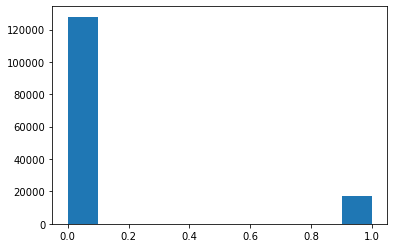

In [25]:
old_page_converted = np.random.choice([1,0], size = n_new, p =[dataframe_ab.converted.mean(), 1- dataframe_ab.converted.mean()])
plt.hist(old_page_converted)

In [26]:
#Difference between old and new means

diff_mean = dataframe_ab_treatment.converted.mean() - dataframe_ab_control.converted.mean() 
diff_mean

-0.0015782389853555567

In [29]:
import statsmodels.api as sm

convert_old = len(dataframe_ab[dataframe_ab['converted'] == 1])
convert_new = len(dataframe_ab_treatment[dataframe_ab_treatment['converted']==1])
n_old = len(dataframe_ab.index)
n_new = len(dataframe_ab_treatment.index)

In [30]:
# performing a two sided test
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
z_score, p_value

(0.7575203653810936, 0.44873816956874313)

In [31]:
# Performing a one taile test
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
z_score, p_value

(0.7575203653810936, 0.7756309152156284)

Cannot reject the null hypothesis that old page converts more or equal to the new page

Performing A/B testing analysis through regression

#### Regression Approach

In [36]:
dataframe_ab['intercept'] = 1
dataframe_ab['group_binary'] = np.where( dataframe_ab['group'] == 'treatment', 1, 0)
dataframe_ab.head()

,user_id,timestamp,group,landing_page,converted,intercept,group_binary
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


In [39]:
lm = sm.OLS(dataframe_ab['converted'], dataframe_ab[['intercept', 'group_binary']])
results = lm.fit()

In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.719
Date:                Thu, 22 Sep 2022   Prob (F-statistic):              0.190
Time:                        12:10:16   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.1204      0.001    141.407      0.000       0.119       0.122
group_binary    -0.0016      0.001     -1.311      0.190      -0.004       0.001
==============================================================================
Omnibus:                   125553.456   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414313.355
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that coefficient on group_binary is not statistically significant. We cannot reject the null hypothesis that treatment is statistically different from control

Maybe confounding factors affecting conversions. Have to control for confounding factors. Lets control for confounding factor 'country'

In [42]:
dataframe_countries = pd.read_csv('countries.csv')
dataframe_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [43]:
dataframe_countries.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [51]:
dataframe_countries = pd.get_dummies(dataframe_countries)
dataframe_countries.head()
dataframe_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   user_id     290584 non-null  int64
 1   CA          290584 non-null  uint8
 2   UK          290584 non-null  uint8
 3   US          290584 non-null  uint8
 4   country_CA  290584 non-null  uint8
 5   country_UK  290584 non-null  uint8
 6   country_US  290584 non-null  uint8
dtypes: int64(1), uint8(6)
memory usage: 3.9 MB


Joining countries datset and A/B dataset using user-id as key

In [52]:
dataframe_ab_countries = dataframe_ab.set_index('user_id').join(dataframe_countries.set_index('user_id'))
dataframe_ab_countries.head()

,timestamp,group,landing_page,converted,intercept,group_binary,CA,UK,US,country_CA,country_UK,country_US
user_id,,,,,,,,,,,,
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,0,1,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,0,1,0,0,1
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,1,0,0,1,0,0
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,0,1,0,0,1,0
839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,1,0,0,1,0,0


Running an OLS of converted on treatment while controlling for country

In [55]:
lm = sm.OLS(dataframe_ab_countries['converted'], dataframe_ab_countries[['intercept','UK','US','group_binary']])
results = lm.fit()

In [56]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.640
Date:                Thu, 22 Sep 2022   Prob (F-statistic):              0.178
Time:                        12:39:36   Log-Likelihood:                -85266.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290580   BIC:                         1.706e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.1161      0.003     42.036      0.000       0.111       0.122
UK               0.0053      0.003      1.784      0.074      -0.001       0.011
US               0.0042      0.003      1.514      0.130      -0.001       0.010
group_binary    -0.0016      0.001     -1.307      0.191      -0.004       0.001
==============================================================================
Omnibus:                   125551.169   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414297.780
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Even controlling for countries treatment doesn't produce statistically significant change on conversion.